# Exercise: Compute summary statistics for the neural data

In [2]:
import pandas as pd

# Set some Pandas options: maximum number of rows/columns it's going to display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

# Load the processed neural data

In [3]:
df = pd.read_csv('processed_QC_passed_2024-07-04_collected_v1.csv')

In [4]:
df.shape

(659, 35)

In [5]:
df.head()

,OP,filename,slice,cell_ch,cell_ID,day,treatment,hrs_incubation,repatch,hrs_after_OP,Rs,Rin,resting_potential,max_spikes,Rheobase,AP_heigth,TH,max_depol,max_repol,membra_time_constant_tau,capacitance,comments,rheo_ramp,AP_halfwidth,Rheobse_ramp,Unnamed: 27,rheos_ramp,comment,,high K concentration,RMP_from_char,tissue_source,area,patient_age,patcher
0,OP230420,23420003.abf,S1,1,23420S1c1,D1,TTX,0.0,no,10.416389,6.675643,39.025301,-74.285889,24,200.0,80.749512,-35.278320,336.181641,-60.791016,19.40,510.601767,0,753.380113,1.151009,NaN,NaN,NaN,NaN,NaN,8 mM,-61.828554,Bielefeld,temporal,13.0,Verji
1,OP230420,23420003.abf,S1,3,23420S1c3,D1,TTX,0.0,no,10.416389,7.867174,48.728367,-69.573975,26,300.0,78.448486,-32.043457,350.097656,-67.138672,17.30,393.397918,1,585.102837,1.006321,NaN,NaN,NaN,NaN,NaN,8 mM,-60.460298,Bielefeld,temporal,13.0,Verji
2,OP230420,23420003.abf,S1,6,23420S1c6,D1,TTX,0.0,no,10.416389,8.820134,35.971082,-54.956055,22,300.0,76.660156,-29.827881,270.629883,-52.246094,14.85,426.098774,3,173.915797,1.266335,NaN,NaN,NaN,NaN,NaN,8 mM,-59.615979,Bielefeld,temporal,13.0,Verji
3,OP230420,23420003.abf,S1,8,23420S1c8,D1,TTX,0.0,yes,10.416389,6.000400,31.599917,-70.550537,22,350.0,81.011963,-33.068848,309.448242,-61.401367,16.65,575.513924,5,786.927898,1.182830,NaN,NaN,NaN,NaN,NaN,8 mM,-60.956350,Bielefeld,temporal,13.0,Verji
4,OP230420,23420061.abf,S1_D2,8,23420S1c8,D2,TTX,19.0,yes,29.633333,8.271614,30.607259,-70.745850,1,1300.0,48.883057,-20.855713,100.952148,-27.465820,13.25,864.892430,29,565.938865,1.504127,NaN,NaN,NaN,NaN,NaN,8 mM,-61.283967,Bielefeld,temporal,13.0,Verji


# 1. Does capacitance change with age?

* Compute the capacitance by patient age, and plot it
* Does it change with age? (eyeballing is enough)

<Axes: xlabel='patient_age'>

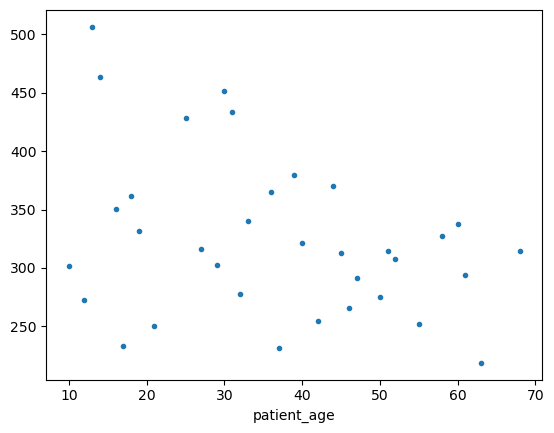

In [6]:
df.groupby('patient_age')['capacitance'].mean().plot(ls='', marker='.')

# 2. Spiking threshold after potassium incubation

1. Does the spiking threshold (TH) change between Day 1 and Day 2?
2. Does this result depend on the treatment?

In [8]:
df.groupby('day')['TH'].mean()

day
D1   -37.276805
D2   -33.039838
Name: TH, dtype: float64

In [9]:
th_per_treatment_and_day = df.pivot_table(index='treatment', columns='day', values='TH', aggfunc='mean')

In [10]:
th_per_treatment_and_day

day,D1,D2
treatment,,
Ctrl,-37.865372,-35.751658
TTX,-36.852170,-30.008780
high K,-36.926069,-33.162092
wash in high K,NaN,-35.791016


In [11]:
th_per_treatment_and_day = df.pivot_table(index='treatment', columns='day', values='TH', aggfunc=['mean', 'std'])
th_per_treatment_and_day

mean                  std          
day                    D1         D2        D1        D2
treatment                                               
Ctrl           -37.865372 -35.751658  4.260140  5.459102
TTX            -36.852170 -30.008780  5.406569  6.577182
high K         -36.926069 -33.162092  3.966294  4.479648
wash in high K        NaN -35.791016       NaN  1.009906